# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

## Inicialização

Aqui iremos carregar as bibliotecas necessárias para a conclusão desse projeto.

In [1]:
# Carregando todas as bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## Carregar dados

Aqui carregaremos os dados (planilhas) que serão usadas para nossa análise.

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar os dados

Vamos preparar os dados de cada dataframe antes de continuar nossa análise.

### Dataframe CALLS

In [3]:
#pegando uma pequena amostra da tabela de ligações.
df_calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
#checando informações sobre o tipo dos dados
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
#alterando o tipo da coluna 'call_date' para datetime, assim poderemos visualizar melhor as informações
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

No dataframe CALLS não existem valores ausentes, e só alterei o tipo de dado da coluna 'call_date' para datetime. O 
restante está de acordo.

### Dataframe INTERNET 

In [6]:
#verificando as informações
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
#pegando uma pequena amostra do dataframe INTERNET 
df_internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Não existem valores ausentes no dataframe INTERNET, e o tipo dos dados de cada coluna também está de acordo.

### Dataframe MESSAGES

In [8]:
#verificando as informações
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
#alterando o tipo da coluna 'message_date' para datetime, assim poderemos visualizar melhor as informações
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [10]:
#pegando uma amostra do dataframe
df_messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


No dataframe MESSAGES não existem valores ausentes, e só alterei o tipo de dado da coluna 'message_date' para datetime. 
O restante está de acordo.

## Planos

In [11]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
# Imprimir uma amostra de dados para os planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Podemos ver que só existem 2 opções de plano, a SURF e a ULTIMATE. 
Não existem valores ausentes e com relação ao tipo dos dados está tudo de acordo. 



[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrigir dados

Nessa tabela não há necessidade de correção nos dados.

### Enriqueça os dados

Nessa tabela já temos as informações necessárias para nossa análise.

## Usuários

In [13]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
#verificando se existem duplicatas
df_users.duplicated().sum()

0

In [15]:
# Imprimir uma amostra de dados para usuários
df_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


A tabela só apresenta valores ausentes da coluna 'churn_date' que é quando o usuário parou de usar o serviço, porém se o valor estiver ausente significa que o usuário ainda estava com o plano ativo na data em que foram colhidos os dados.

Nas colunas reg_date e churn_date, irei alterar o tipo dos dados para datetime. 


### Corrigir dados

Alterando o tipo dos dados

In [16]:
#alterando o tipo dos dados das colunas 'reg_date' e 'churn_date' para datetime para ter melhor visualização
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer Dados

Criando novas colunas com informações adicionais das datas de inicio e termino do contrato dos planos.

In [17]:
# Adicionando valores data/hora para quando o plano foi contratado e encerrado.

#inicio do contrato
df_users['start_day'] = df_users['reg_date'].dt.day #dia do mês
df_users['start_dayofweek'] = df_users['reg_date'].dt.dayofweek #dia da semana
df_users['start_month'] = df_users['reg_date'].dt.month #mês
df_users['start_year'] = df_users['reg_date'].dt.year #ano

#encerramento do contrato
df_users['final_day'] = df_users['churn_date'].dt.day #dia do mês
df_users['final_dayofweek'] = df_users['churn_date'].dt.dayofweek #dia da semana
df_users['final_month'] = df_users['churn_date'].dt.month #mês
df_users['final_year'] = df_users['churn_date'].dt.year #ano

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,start_day,start_dayofweek,start_month,start_year,final_day,final_dayofweek,final_month,final_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,24,0,12,2018,NaN,NaN,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,13,0,8,2018,NaN,NaN,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,21,6,10,2018,NaN,NaN,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,28,6,1,2018,NaN,NaN,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,23,2,5,2018,NaN,NaN,NaN,NaN


In [18]:
#Criando a coluna "canceled" que dirá se o plano foi cancelado sim ou não
df_users['is_canceled'] = df_users['churn_date'].apply(lambda x: 'yes' if pd.notnull(x) else 'no')

#vendo se funcionou
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,start_day,start_dayofweek,start_month,start_year,final_day,final_dayofweek,final_month,final_year,is_canceled
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,24,0,12,2018,NaN,NaN,NaN,NaN,no
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,13,0,8,2018,NaN,NaN,NaN,NaN,no
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,21,6,10,2018,NaN,NaN,NaN,NaN,no
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,28,6,1,2018,NaN,NaN,NaN,NaN,no
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,23,2,5,2018,NaN,NaN,NaN,NaN,no


In [19]:
#Preenchendo os valores nulos em 'churn_date' com '0000-00-00' quando o plano ainda não tiver sido cancelado
df_users.loc[df_users['is_canceled'] == 'no', 'churn_date'] = df_users.loc[df_users['is_canceled'] == 'no', 'churn_date'].fillna('0000-00-00')

#testando
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,start_day,start_dayofweek,start_month,start_year,final_day,final_dayofweek,final_month,final_year,is_canceled
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0000-00-00,24,0,12,2018,NaN,NaN,NaN,NaN,no
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0000-00-00,13,0,8,2018,NaN,NaN,NaN,NaN,no
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0000-00-00,21,6,10,2018,NaN,NaN,NaN,NaN,no
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0000-00-00,28,6,1,2018,NaN,NaN,NaN,NaN,no
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0000-00-00,23,2,5,2018,NaN,NaN,NaN,NaN,no


In [20]:
#preenchendo as colunas das datas de cancelamento com '0000-00-00' quando o plano ainda não tiver sido cancelado
columns_to_fill = ['final_day', 'final_dayofweek', 'final_month', 'final_year']
df_users.loc[df_users['is_canceled'] == 'no', columns_to_fill] = '0000-00-00'

In [21]:
#testando
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,start_day,start_dayofweek,start_month,start_year,final_day,final_dayofweek,final_month,final_year,is_canceled
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0000-00-00,24,0,12,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0000-00-00,13,0,8,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,0000-00-00,21,6,10,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,0000-00-00,28,6,1,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,0000-00-00,23,2,5,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no


## Chamadas

In [22]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [23]:
# Imprimir uma amostra de dados para chamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [24]:
#verificando se existem duplicatas
df_calls.duplicated().sum()

0

Não existem dados duplicados nessa tabela, e o tipo dos dados estão de acordo.


### Corrigir dados

In [25]:
#arredondando para cima os valores em 'duration' para sabermos quantos minutos foram gastos na chamada
df_calls['duration'] = np.ceil(df_calls['duration'])

#testando
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


### Enriquecer dados

Aqui também irei adicionar informações extras sobre a data da ligação.



In [26]:
# Adicionando colunas com valores extras sobre a data em que foi feita a ligação

df_calls['call_date_day'] = df_calls['call_date'].dt.day #dia do mês
df_calls['call_date_dayofweek'] = df_calls['call_date'].dt.dayofweek #dia da semana
df_calls['call_date_month'] = df_calls['call_date'].dt.month #mês
df_calls['call_date_year'] = df_calls['call_date'].dt.year #ano

In [27]:
#exibindo as novas colunas
df_calls.head(10)

,id,user_id,call_date,duration,call_date_day,call_date_dayofweek,call_date_month,call_date_year
0,1000_93,1000,2018-12-27,9.0,27,3,12,2018
1,1000_145,1000,2018-12-27,14.0,27,3,12,2018
2,1000_247,1000,2018-12-27,15.0,27,3,12,2018
3,1000_309,1000,2018-12-28,6.0,28,4,12,2018
4,1000_380,1000,2018-12-30,5.0,30,6,12,2018
5,1000_388,1000,2018-12-31,3.0,31,0,12,2018
6,1000_510,1000,2018-12-27,6.0,27,3,12,2018
7,1000_521,1000,2018-12-28,15.0,28,4,12,2018
8,1000_530,1000,2018-12-28,6.0,28,4,12,2018
9,1000_544,1000,2018-12-26,5.0,26,2,12,2018


As chamadas com duração zero serão mantidas, pois só são cobradas chamadas a partir de 1 segundo de duração. 
então acredito que chamadas zeradas não farão diferença nos resultados da nossa análise.

## Mensagens

In [28]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
# Imprima uma amostra dos dados para as mensagens
df_messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [30]:
#verificando duplicatas
df_messages.duplicated().sum()

0

Não existem dados duplicados nesse dataframe, e o tipo dos dados estão de acordo.


### Corrigir dados

não existem problemas óbvios a serem corrigidos nesse dataframe

### Enriquecer dados

Vamos adicionar valores extras sobre a data de quando foram enviadas as mensagens.


In [31]:
# Adicionando colunas com valores extras sobre a data em que foi enviada a mensagem.

df_messages['message_date_day'] = df_messages['message_date'].dt.day #dia do mês
df_messages['message_date_dayofweek'] = df_messages['message_date'].dt.dayofweek #dia da semana
df_messages['message_date_month'] = df_messages['message_date'].dt.month #mês
df_messages['message_date_year'] = df_messages['message_date'].dt.year #ano

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      76051 non-null  object        
 1   user_id                 76051 non-null  int64         
 2   message_date            76051 non-null  datetime64[ns]
 3   message_date_day        76051 non-null  int64         
 4   message_date_dayofweek  76051 non-null  int64         
 5   message_date_month      76051 non-null  int64         
 6   message_date_year       76051 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 4.1+ MB


## Internet

In [32]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Imprime uma amostra de dados para o tráfego da Internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [34]:
#verificando duplicatas
df_internet.duplicated().sum()

0

Vemos que não existem dados duplicados nessa tabela, irei mudar o tipo dos dados na coluna 'session_date' para datetime.
O restando está de acordo.


### Corrigir dados


Vamos mudar o tipo dos dados da coluna 'session_date' para datetime

In [35]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer dados

Vamos incluir colunas com informações extras sobre a data em que foi feito o acesso a internet.


In [36]:
# Adicionando colunas com valores extras sobre a data em que foi feito o acesso

df_internet['session_date_day'] = df_internet['session_date'].dt.day #dia do mês
df_internet['session_date_dayofweek'] = df_internet['session_date'].dt.dayofweek #dia da semana
df_internet['session_date_month'] = df_internet['session_date'].dt.month #mês
df_internet['session_date_year'] = df_internet['session_date'].dt.year #ano

df_internet.head(10)

,id,user_id,session_date,mb_used,session_date_day,session_date_dayofweek,session_date_month,session_date_year
0,1000_13,1000,2018-12-29,89.86,29,5,12,2018
1,1000_204,1000,2018-12-31,0.00,31,0,12,2018
2,1000_379,1000,2018-12-28,660.40,28,4,12,2018
3,1000_413,1000,2018-12-26,270.99,26,2,12,2018
4,1000_442,1000,2018-12-27,880.22,27,3,12,2018
5,1001_0,1001,2018-08-24,284.68,24,4,8,2018
6,1001_3,1001,2018-12-09,656.04,9,6,12,2018
7,1001_4,1001,2018-11-04,16.97,4,6,11,2018
8,1001_10,1001,2018-11-27,135.18,27,1,11,2018
9,1001_15,1001,2018-12-13,761.92,13,3,12,2018


## Condições do plano de estudos

In [37]:
# Imprimindo as condições do plano e certifique-se de que estão claras para você

PLANO SURF

- Preço mensal: $20
- 500 minutos mensais, 50 mensagens de texto, e 15 GB de dados

- Depois de exceder os limites do pacote:
- 1 minuto: 3 centavos
- 1 mensagem de texto: 3 centavos
- 1 GB de dados: $10
- 
- Os minutos são sempre arredondados para cima e os GB excedentes são calculado com a somatória total usada no mês e também são arredondados para cima. 

PLANO ULTIMATE

- Preço mensal: $70
- 3000 minutos mensais, 1000 mensagens de texto, e 30 GB de dados

- Depois de exceder os limites do pacote:
- 1 minuto: 1 centavo
- 1 mensagem de texto: 1 centavo
- 1 GB de dados: $7
- 
- Os minutos são sempre arredondados para cima e os GB excedentes são calculado com a somatória total usada no mês e também são arredondados para cima.

## Dados agregados por usuário



In [38]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Calcular o número de chamadas feitas por cada usuário por mês
total_calls = df_calls.groupby(['user_id', df_calls['call_date'].dt.month]).size().reset_index(name='total_calls')

#renomeando a coluna call_date para month, para sabermos de qual mês se trata
total_calls = total_calls.rename(columns={'call_date': 'month'})

total_calls

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


Na coluna user_id temos o identificador do cliente, e na coluna id a soma de quantas chamadas ele fez.

In [39]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
total_minutes = df_calls.groupby(['user_id', df_calls['call_date'].dt.month])['duration'].sum().reset_index(name='total_minutes')

#renomenando a coluna call_date para month, para sabermos de qual mês se trata
total_minutes = total_minutes.rename(columns= {'call_date': 'month'})

total_minutes

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


Na coluna user_id temos o identificador do cliente, na coluna month o mês de referencia e na coluna total_minutes temos o total em minutos gastos no mês.

In [40]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
total_messages = df_messages.groupby(['user_id', df_messages['message_date'].dt.month])['id'].count().reset_index(name='total_messages')

#renomeando a coluna message_date para month
total_messages = total_messages.rename(columns = {'message_date': 'month'})

total_messages

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [41]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

#criando uma nova coluna 'gb_used' no df_internet com o total de gigabytes usados por mês
df_internet['gb_used'] = np.ceil(df_internet['mb_used'] / 1024)  # Converter megabytes para gigabytes e arredondar para cima

total_internet = df_internet.groupby(['user_id', 'session_date_month'])['gb_used'].sum().reset_index()

#renomenado a coluna com o mês
total_internet = total_internet.rename(columns={'session_date_month': 'month'})

total_internet

,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


In [42]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês

df_totals = total_calls.merge(total_minutes, on=['user_id', 'month'], how='outer')
df_totals = df_totals.merge(total_messages, on=['user_id', 'month'], how='outer')
df_totals = df_totals.merge(total_internet, on=['user_id', 'month'], how='outer')

df_totals




,user_id,month,total_calls,total_minutes,total_messages,gb_used
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,27.0
2289,1361,5,NaN,NaN,2.0,7.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,2.0


In [43]:
# Adicione as informações do plano

df_totals = df_totals.merge(df_users[['user_id', 'plan']], left_on='user_id', right_on='user_id', how='outer')

df_totals

,user_id,month,total_calls,total_minutes,total_messages,gb_used,plan
0,1000,12.0,16.0,124.0,11.0,4.0,ultimate
1,1001,8.0,27.0,182.0,30.0,21.0,surf
2,1001,9.0,49.0,315.0,44.0,41.0,surf
3,1001,10.0,65.0,393.0,53.0,50.0,surf
4,1001,11.0,64.0,426.0,36.0,49.0,surf
...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf
2299,1319,NaN,NaN,NaN,NaN,NaN,surf
2300,1378,NaN,NaN,NaN,NaN,NaN,surf
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate


In [44]:
df_totals['month'].value_counts()

12.0    469
11.0    410
10.0    343
9.0     280
8.0     233
7.0     180
6.0     144
5.0     106
4.0      71
3.0      35
2.0      16
1.0       6
Name: month, dtype: int64

Teve um aumento gradual mês a mês no número de acessos à internet feitos pelos usuários, começando o ano com poucos acessos e terminando com muito mais.

In [45]:
# Calcule a receita mensal de cada usuário

# Definindo os valores dos planos
surf_price = 20
ultimate_price = 70
surf_limits = {'minutes': 500, 'messages': 50, 'gb': 15}
ultimate_limits = {'minutes': 3000, 'messages': 1000, 'gb': 30}
extra_minute_cost_surf = 0.03
extra_message_cost_surf = 0.03
extra_gb_cost_surf = 10
extra_minute_cost_ultimate = 0.01
extra_message_cost_ultimate = 0.01
extra_gb_cost_ultimate = 7

# Calculando a receita mensal com base nos planos e nos dados
df_totals['monthly_revenue'] = np.where(
    df_totals['plan'] == 'surf',
    surf_price +
    (df_totals['total_minutes'] - surf_limits['minutes']) * extra_minute_cost_surf +
    (df_totals['total_messages'] - surf_limits['messages']) * extra_message_cost_surf +
    (df_totals['gb_used'] - surf_limits['gb']) * extra_gb_cost_surf,
    np.where(
        df_totals['plan'] == 'ultimate',
        ultimate_price +
        (df_totals['total_minutes'] - ultimate_limits['minutes']) * extra_minute_cost_ultimate +
        (df_totals['total_messages'] - ultimate_limits['messages']) * extra_message_cost_ultimate +
        (df_totals['gb_used'] - ultimate_limits['gb']) * extra_gb_cost_ultimate,
        0
    )
)

#Preenchendo valores nulos com zero
df_totals['monthly_revenue'] = df_totals['monthly_revenue'].fillna(0)

# Substituindo valores negativos por zero
df_totals['monthly_revenue'] = np.maximum(df_totals['monthly_revenue'], 0)

df_totals

,user_id,month,total_calls,total_minutes,total_messages,gb_used,plan,monthly_revenue
0,1000,12.0,16.0,124.0,11.0,4.0,ultimate,0.00
1,1001,8.0,27.0,182.0,30.0,21.0,surf,69.86
2,1001,9.0,49.0,315.0,44.0,41.0,surf,274.27
3,1001,10.0,65.0,393.0,53.0,50.0,surf,366.88
4,1001,11.0,64.0,426.0,36.0,49.0,surf,357.36
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,0.00
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,0.00
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,0.00
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,0.00


## Estudar o comportamento do usuário



Aqui irei analisar alguns gráficos para entender melhor a relação entre o consumo em minutos, dados e mensagens de cada usuário e a receita mensal

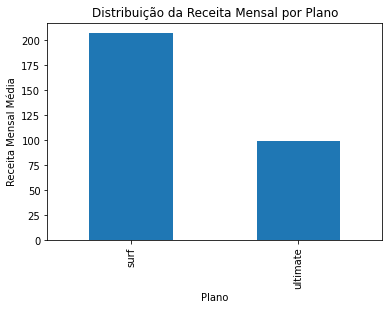

In [46]:
#visualizando a distribuição da receita mensal média por plano usando gráfico de barras

df_totals.groupby('plan')['monthly_revenue'].mean().plot(kind='bar')
plt.xlabel('Plano')
plt.ylabel('Receita Mensal Média')
plt.title('Distribuição da Receita Mensal por Plano')
plt.show()

Podemos observar que o plano SURF gera em média mais que o dobro de receita em comparação ao plano ultimate.

Abaixo irei criar um gráfico utilizando boxplots para entender melhor o consumo dos usuários de cada plano.

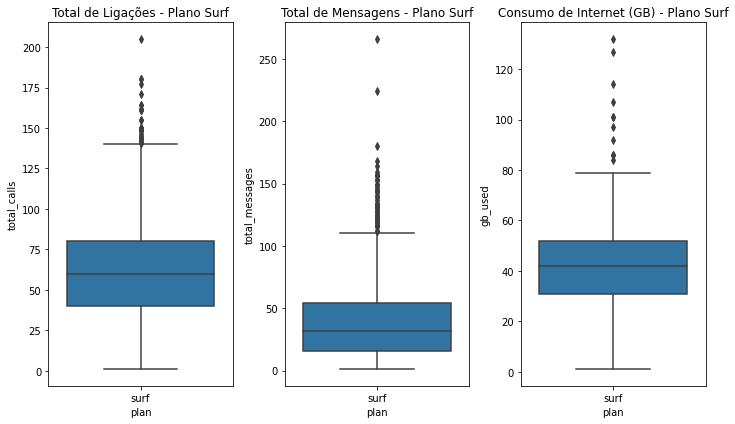

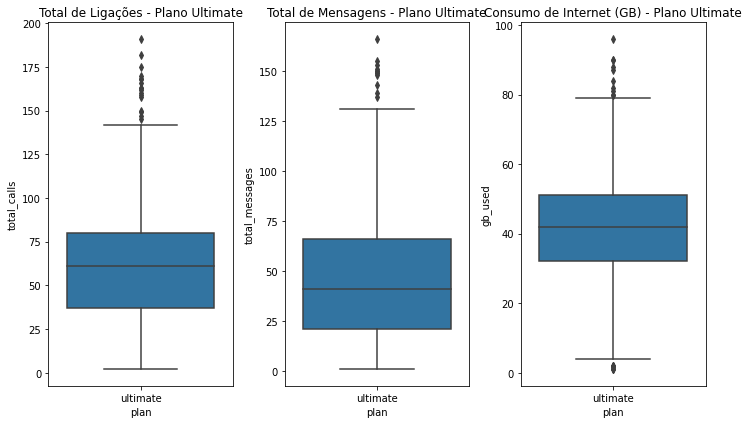

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

#filtrando os dados para cada plano
surf_data = df_totals[df_totals['plan'] == 'surf']
ultimate_data = df_totals[df_totals['plan'] == 'ultimate']

#criando os gráficos utilizando boxplots
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=surf_data, x='plan', y='total_calls')
plt.title('Total de Ligações - Plano Surf')
plt.subplot(1, 3, 2)
sns.boxplot(data=surf_data, x='plan', y='total_messages')
plt.title('Total de Mensagens - Plano Surf')
plt.subplot(1, 3, 3)
sns.boxplot(data=surf_data, x='plan', y='gb_used')
plt.title('Consumo de Internet (GB) - Plano Surf')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=ultimate_data, x='plan', y='total_calls')
plt.title('Total de Ligações - Plano Ultimate')
plt.subplot(1, 3, 2)
sns.boxplot(data=ultimate_data, x='plan', y='total_messages')
plt.title('Total de Mensagens - Plano Ultimate')
plt.subplot(1, 3, 3)
sns.boxplot(data=ultimate_data, x='plan', y='gb_used')
plt.title('Consumo de Internet (GB) - Plano Ultimate')
plt.tight_layout()
plt.show()

Total de Ligações:

- Plano Surf: A mediana das ligações é relativamente baixa, indicando que a maioria dos clientes desse plano faz um número moderado de ligações. Existem alguns valores discrepantes (outliers) indicando um pequeno grupo de clientes que realizam um número muito alto de ligações.
- Plano Ultimate: A mediana das ligações é maior em comparação ao plano Surf, sugerindo que os clientes desse plano tendem a fazer mais ligações. Também existem alguns valores discrepantes indicando clientes com um número muito alto de ligações.

Total de Mensagens:

- Plano Surf: A mediana das mensagens é relativamente baixa, indicando que a maioria dos clientes desse plano envia um número moderado de mensagens. Alguns valores discrepantes estão presentes, indicando clientes com um número muito alto de mensagens.
- Plano Ultimate: A mediana das mensagens é maior em comparação ao plano Surf, sugerindo que os clientes desse plano tendem a enviar mais mensagens. Também existem alguns valores discrepantes indicando clientes com um número muito alto de mensagens.

Consumo de Internet (GB):

- Plano Surf: A mediana do consumo de internet é relativamente baixa, indicando que a maioria dos clientes desse plano consome uma quantidade moderada de dados. Existem alguns valores discrepantes indicando clientes com um consumo muito alto de dados.
- Plano Ultimate: A mediana do consumo de internet é maior em comparação ao plano Surf, sugerindo que os clientes desse plano tendem a consumir mais dados. Também existem alguns valores discrepantes indicando clientes com um consumo muito alto de dados.

### Chamadas

In [48]:
# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.

#adicionando a coluna com o plano do usuário ao df de chamadas 
df_calls = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

df_calls


,id,user_id,call_date,duration,call_date_day,call_date_dayofweek,call_date_month,call_date_year,plan
0,1000_93,1000,2018-12-27,9.0,27,3,12,2018,ultimate
1,1000_145,1000,2018-12-27,14.0,27,3,12,2018,ultimate
2,1000_247,1000,2018-12-27,15.0,27,3,12,2018,ultimate
3,1000_309,1000,2018-12-28,6.0,28,4,12,2018,ultimate
4,1000_380,1000,2018-12-30,5.0,30,6,12,2018,ultimate
...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,21,2,11,2018,surf
137731,1499_200,1499,2018-10-20,11.0,20,5,10,2018,surf
137732,1499_201,1499,2018-09-21,9.0,21,4,9,2018,surf
137733,1499_202,1499,2018-10-10,1.0,10,2,10,2018,surf


In [49]:
#criando uma nova coluna com o mês em que a chamada foi efetuada
df_calls['month'] = df_calls['call_date'].dt.month

In [50]:
#exibindo o número de chamadas efetuadas em cada mês
df_calls['month'].value_counts()

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: month, dtype: int64

A quantidade de chamadas aumentou a cada mês do ano. 

In [51]:
#adicionando a coluna total_minutes ao df com as chamadas
df_calls = df_calls.merge(total_minutes[['user_id', 'total_minutes']], on='user_id', how='left')

In [52]:
#agrupando os dados pelo plano e pelo mês, calculando a média de minutos gastos em ligações
average_duration = df_calls.groupby(['plan', 'month'])['total_minutes'].mean().unstack()

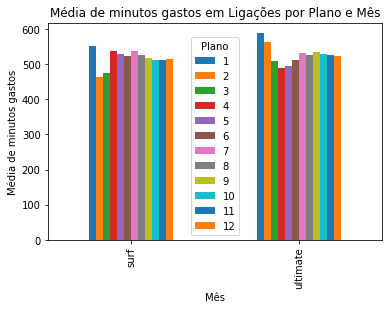

In [53]:
#criando o gráfico de barras para visualizar a média de minutos gastos de cada plano por mês
average_duration.plot(kind='bar')
plt.xlabel('Mês')
plt.ylabel('Média de minutos gastos')
plt.title('Média de minutos gastos em Ligações por Plano e Mês')
plt.legend(title='Plano')
plt.show()

Podemos observar que a média de minutos gastos em ambos os planos é bem parecida.
No mês 2 os usuários do plano ultimate tiveram um gasto maior

In [54]:
# Compare o número de minutos que os usuários de cada plano requerem a cada mês. Construa um histograma.

#filtrando o df para separar os usuários de cada plano:
df_surf = df_calls[df_calls['plan'] == 'surf']
df_ultimate = df_calls[df_calls['plan'] == 'ultimate']

#calculando o número total de minutos por mês em cada plano:
minutes_surf = df_surf.groupby('month')['total_minutes'].sum()
minutes_ultimate = df_ultimate.groupby('month')['total_minutes'].sum()


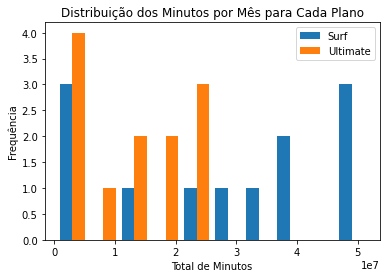

In [55]:
#construindo o histograma para visualizar a distribuição dos minutos por mês para cada plano

plt.hist([minutes_surf, minutes_ultimate], bins=10, label=['Surf', 'Ultimate'])
plt.xlabel('Total de Minutos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Minutos por Mês para Cada Plano')
plt.legend()
plt.show()

Em geral, vemos que a maioria dos usuários de ambos os planos requer um número menor de minutos por mês, mas o plano Ultimate pode ter um número um pouco maior de usuários com necessidade de minutos extras em alguns meses.

In [56]:
# Calcule a média e a variação da duração mensal das chamadas

# Calculando a média da duração das chamadas por mês
mean_duration = df_calls.groupby('month')['duration'].mean()

# Calculando a variação da duração das chamadas por mês
variance_duration = df_calls.groupby('month')['duration'].var()

print("Média da duração das chamadas por mês:")
print(mean_duration)

print("\nVariação da duração das chamadas por mês:")
print(variance_duration)

Média da duração das chamadas por mês:
month
1     6.860465
2     7.083964
3     6.949956
4     7.175014
5     7.147940
6     7.209176
7     7.172189
8     7.086604
9     7.157637
10    7.115298
11    7.159758
12    7.185907
Name: duration, dtype: float64

Variação da duração das chamadas por mês:
month
1     33.903933
2     35.511362
3     33.764061
4     34.427409
5     36.042286
6     35.946833
7     35.165079
8     35.316418
9     35.789449
10    35.288764
11    35.401135
12    35.565606
Name: duration, dtype: float64


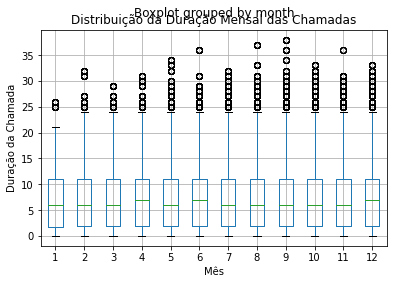

In [57]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# Criando um DataFrame somente com a coluna de duração e o mês
data = df_calls[['month', 'duration']]

# Criando o diagrama de caixa
data.boxplot(by='month', column='duration')

# Configurando os rótulos e título
plt.xlabel('Mês')
plt.ylabel('Duração da Chamada')
plt.title('Distribuição da Duração Mensal das Chamadas')

plt.show()

Podemos notar que em alguns meses, como janeiro e abril, a duração das chamadas tem uma dispersão maior, indicada pelos bigodes mais longos. Isso significa que existem chamadas com duração significativamente mais longa ou mais curta nessas ocasiões.

A mediana da duração das chamadas parece ser mais consistente ao longo dos meses, representada pela linha no centro da caixa. Isso sugere que a maioria das chamadas tem uma duração semelhante e que não há grandes variações entre os meses.

A presença de outliers em alguns meses, indica a ocorrência de chamadas com duração muito acima ou abaixo da média. Esses outliers representam chamadas muito longas.


### conclusão

Podemos concluir que os usuários dos planos Surf e Ultimate apresentam diferenças em relação à duração média das chamadas, variação da duração e distribuição ao longo do tempo. 

Os usuários do plano Ultimate tendem a realizar chamadas mais longas em média e apresentam uma maior variação nas durações das chamadas. 

Por outro lado, os usuários do plano Surf tendem a ter chamadas mais curtas em média e uma variação menor. Essas diferenças podem estar relacionadas aos recursos e benefícios oferecidos por cada plano, assim como às preferências e necessidades dos usuários.

### Mensagens

In [58]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

#adicionando a coluna com o plano de cada usuário ao df de mensagens
df_messages = df_messages.merge(df_users[['user_id', 'plan']], on='user_id', how='outer')

#adicionando a coluna total_messages ao df de mensagens
df_messages = df_messages.merge(df_totals[['user_id', 'total_messages']], on='user_id', how='outer')

df_messages

,id,user_id,message_date,message_date_day,message_date_dayofweek,message_date_month,message_date_year,plan,total_messages
0,1000_125,1000,2018-12-27,27.0,3.0,12.0,2018.0,ultimate,11.0
1,1000_160,1000,2018-12-31,31.0,0.0,12.0,2018.0,ultimate,11.0
2,1000_223,1000,2018-12-31,31.0,0.0,12.0,2018.0,ultimate,11.0
3,1000_251,1000,2018-12-27,27.0,3.0,12.0,2018.0,ultimate,11.0
4,1000_255,1000,2018-12-26,26.0,2.0,12.0,2018.0,ultimate,11.0
...,...,...,...,...,...,...,...,...,...
474634,NaN,1498,NaT,NaN,NaN,NaN,NaN,surf,NaN
474635,NaN,1499,NaT,NaN,NaN,NaN,NaN,surf,NaN
474636,NaN,1499,NaT,NaN,NaN,NaN,NaN,surf,NaN
474637,NaN,1499,NaT,NaN,NaN,NaN,NaN,surf,NaN


In [59]:
#calculando o numero total de mensagens por mês em cada plano:
messages_per_month = df_messages.groupby(['message_date_month', 'plan'])['total_messages'].sum().reset_index()

messages_per_month


,message_date_month,plan,total_messages
0,1.0,surf,14112.0
1,1.0,ultimate,37951.0
2,2.0,surf,58507.0
3,2.0,ultimate,79963.0
4,3.0,surf,147099.0
5,3.0,ultimate,135116.0
6,4.0,surf,460400.0
7,4.0,ultimate,289728.0
8,5.0,surf,1018409.0
9,5.0,ultimate,576776.0


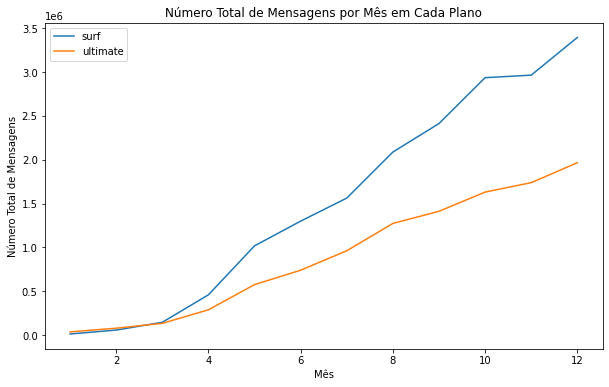

In [60]:
#comparando os resultados e visualizá-los em um gráfico de linha

#Criando o gráfico de linha
plt.figure(figsize=(10, 6))
for plan in messages_per_month['plan'].unique():
    data = messages_per_month[messages_per_month['plan'] == plan]
    plt.plot(data['message_date_month'], data['total_messages'], label=plan)

#Configurando os rótulos e título do gráfico
plt.xlabel('Mês')
plt.ylabel('Número Total de Mensagens')
plt.title('Número Total de Mensagens por Mês em Cada Plano')
plt.legend()

plt.show()

Podemos observar possíveis padrões ou variações em alguns meses. 
É possível identificar meses em que há um aumento ou diminuição significativa no número de mensagens enviadas, o que pode estar relacionado a eventos específicos ou a comportamentos típicos dos usuários.



Os usuários do plano surf tendem a enviar mais mensagens em média em comparação com os usuários do plano ultimate. 

A variação do número de mensagens é maior entre os usuários do plano Ultimate em comparação com os usuários do plano Surf. 

Essas diferenças podem estar relacionadas aos limites do pacote oferecidos por cada plano e às preferências individuais dos usuários em relação à comunicação por mensagens.


### Internet

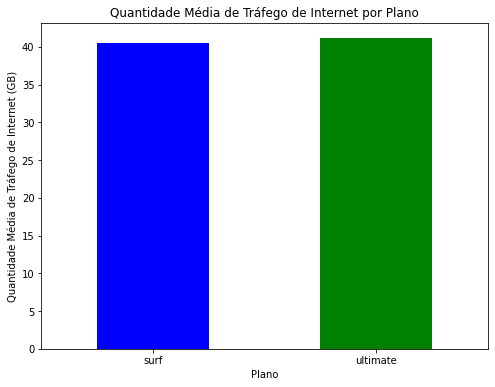

In [61]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano


#Filtrando o DataFrame para incluir apenas as colunas relevantes
data_internet = df_totals[['plan', 'gb_used']]

#Calculando a média do tráfego de internet por plano
mean_gb_used = data_internet.groupby('plan')['gb_used'].mean()

#gráfico de barras
plt.figure(figsize=(8, 6))
mean_gb_used.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Plano')
plt.ylabel('Quantidade Média de Tráfego de Internet (GB)')
plt.title('Quantidade Média de Tráfego de Internet por Plano')
plt.xticks(rotation=0)

plt.show()


In [62]:
#criando novos df filtrados para separar os usuários de cada plano
df_surf_internet = df_totals[df_totals['plan'] == 'surf']
df_ultimate_internet = df_totals[df_totals['plan'] == 'ultimate']

In [63]:
#calculando a quantidade total de tráfego de internet por mês em cada plano
internet_surf = df_surf_internet.groupby('month')['gb_used'].sum()
internet_ultimate = df_ultimate_internet.groupby('month')['gb_used'].sum()

print(internet_surf)

print('\n')
    
internet_ultimate

month
1.0        28.0
2.0       270.0
3.0       719.0
4.0      1444.0
5.0      2606.0
6.0      3639.0
7.0      4872.0
8.0      6525.0
9.0      7803.0
10.0     9951.0
11.0    11308.0
12.0    13976.0
Name: gb_used, dtype: float64




month
1.0       61.0
2.0      278.0
3.0      483.0
4.0      807.0
5.0     1140.0
6.0     1685.0
7.0     2339.0
8.0     3026.0
9.0     3480.0
10.0    4405.0
11.0    5173.0
12.0    6701.0
Name: gb_used, dtype: float64

<Figure size 720x432 with 0 Axes>

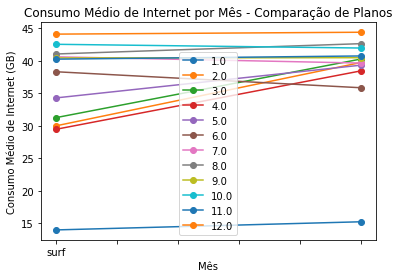

In [64]:
#criando gráfico de linha para comparar o consumo de internet nos dois planos

#Filtrar o DataFrame para incluir apenas as colunas relevantes
data = df_totals[['plan', 'month', 'gb_used']]

#Agrupar os dados por plano e mês, e calcular a média do consumo de internet
mean_gb_used = data.groupby(['plan', 'month'])['gb_used'].mean().unstack()

#Criar o gráfico de linha
plt.figure(figsize=(10, 6))
mean_gb_used.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Consumo Médio de Internet (GB)')
plt.title('Consumo Médio de Internet por Mês - Comparação de Planos')
plt.legend()

#Exibir o gráfico
plt.show()


Podemos identificar possíveis padrões ou variações sazonais. É possível observar meses em que há um aumento ou diminuição significativa no consumo de dados em alguns meses, o que pode estar relacionado a eventos específicos.

mas no geral a média de consumo de dados é semelhante entre os dois planos.


## Receita

In [65]:
#comparando a receita média mensal dos usuários de cada plano 
revenue_mean = df_totals.groupby(['plan'])['monthly_revenue'].mean()

revenue_mean

plan
surf        207.495757
ultimate     99.241064
Name: monthly_revenue, dtype: float64

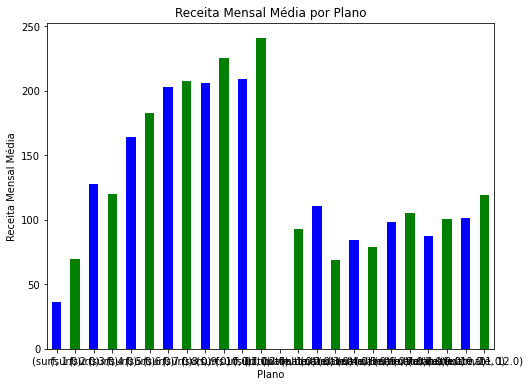

In [66]:
#Plotar o gráfico de barras comparando a receita mensal média por plano

#Filtrando o DataFrame para incluir apenas as colunas relevantes
data_revenue = df_totals[['plan', 'monthly_revenue', 'month']]

#calculando a média da receita mensal por plano
mean_monthly_revenue = data_revenue.groupby(['plan', 'month'])['monthly_revenue'].mean()

#gráfico de barras
plt.figure(figsize=(8, 6))
mean_monthly_revenue.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Plano')
plt.ylabel('Receita Mensal Média')
plt.title('Receita Mensal Média por Plano')
plt.xticks(rotation=0)

plt.show()




Podemos concluir que o plano SURF gera mais receita que o plano ULTIMATE.

Mesmo o pacote inicial sendo mais barato, as pessoas assinantes do plano SURF tendem a contratar serviços adicionais, exceder os minutos e principalmente a franquia de dados do pacote. 

Sendo assim, o plano SURF acaba gerando mais receita para a empresa do que o plano ULTIMATE.

## Testar hipóteses estatísticas

In [67]:
# Teste as hipóteses

#Testand a hipótese de que a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.

import scipy.stats as stats #importando a biblioteca scipy.stats para fazer o TESTE-T com ela 

# Separar as amostras de receita para cada plano
revenue_surf = df_totals[df_totals['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = df_totals[df_totals['plan'] == 'ultimate']['monthly_revenue']

# Realizar o teste t de duas amostras independentes
t_statistic, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

# Comparar o valor-p com o nível de significância
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula")
    print("Há evidências estatísticas de que a receita média dos usuários dos planos Ultimate e Surf é diferente.")
else:
    print("Não rejeitar a hipótese nula")
    print("Não há evidências estatísticas suficientes para concluir que a receita média dos usuários dos planos Ultimate e Surf é diferente.")

Rejeitar a hipótese nula
Há evidências estatísticas de que a receita média dos usuários dos planos Ultimate e Surf é diferente.


Acima testei a hipótese da receita média dos planos ser diferente por conta do plano. 
Utilizei o df_totals onde estão armazenados os valores totais do mês de cada usuário, e o resultado foi rejeitar a hipótese nula.

In [68]:
#adicionando a coluna receita_mensal ao df_users 
df_users = df_users.merge(df_totals[['user_id', 'monthly_revenue']], on='user_id', how='left')

In [69]:
df_users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [70]:
df_users[df_users['city'].str.contains("NY-NJ")]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,start_day,start_dayofweek,start_month,start_year,final_day,final_dayofweek,final_month,final_year,is_canceled,monthly_revenue
56,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,0000-00-00,25,6,11,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,0.00
57,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,0000-00-00,25,6,11,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,58.84
75,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07 00:00:00,20,4,4,2018,7.0,4.0,9.0,2018.0,yes,0.00
76,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07 00:00:00,20,4,4,2018,7.0,4.0,9.0,2018.0,yes,0.00
77,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07 00:00:00,20,4,4,2018,7.0,4.0,9.0,2018.0,yes,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0000-00-00,4,6,2,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,0.00
2295,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0000-00-00,4,6,2,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,0.00
2296,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0000-00-00,4,6,2,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,0.00
2297,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0000-00-00,4,6,2,2018,0000-00-00,0000-00-00,0000-00-00,0000-00-00,no,0.00


In [71]:
#Separarando as amostras de receita para usuários da área de NY-NJ e demais regiões usando o df_users
revenue_nynj = df_users[df_users['city'].str.contains("NY-NJ")]['monthly_revenue']
revenue_other = df_users[~df_users['city'].str.contains("NY-NJ")]['monthly_revenue']

#Realizaando o teste t de duas amostras independentes
t_statistic, p_value = stats.ttest_ind(revenue_nynj, revenue_other, equal_var=False)

#Compararando o valor-p com o nível de significância
alpha = 0.05
if p_value < alpha:
    print("Rejeitar a hipótese nula")
    print("Há evidências estatísticas de que a receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.")
else:
    print("Não rejeitar a hipótese nula")
    print("Não há evidências estatísticas suficientes para concluir que a receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.")


Não rejeitar a hipótese nula
Não há evidências estatísticas suficientes para concluir que a receita média dos usuários da área de NY-NJ difere da receita média dos usuários das demais regiões.


Acima testei a hipótese da receita média dos usuários das cidade NY-NJ serem diferentes do restante dos usuários.
Utilizei o df_users onde estão todos os usuários da amostra e adicionei a coluna com a receita mensal de cada um deles a esse df. 
O resultado foi de não rejeitar a hipótese nula.

## Conclusão geral



 Primeiramente arrumamos os dados em cada dataframe, checando valores ausentes, duplicados e corrigindo o tipo dos dados.
 Em seguida adicionamos algumas informações úteis aos dataframes.
 Depois juntamos essas informações de cada dataframe em um só, já somando o total mensal gasto por cada usuário. 
 Depois criamos gráficos para analisar o comportamento dos usuários com base em cada plano para saber qual gerava mais receita, qual consumia mais etc.. 
 Por fim testamos as hipóteses do usuário de um plano gerar mais receita que o outro, e também a hipótese de que os usuários de uma determinada cidade gerarem mais receita que o restante. 
 
 Contudo eu concluo que os usuários do planos SURF acabam gerando mais receita individualmente que os usuários do plano ULTIMATE, pois seus pacote de serviços iniciais acabam e eles tendem a contratar mais serviços extras. 
 E com base no teste de hipóteses, os planos tem SIM diferença na geração de receita. 
 
 então acredito que a empresa deva focar mais suas campanhas de marketing e anuncios no plano SURF pois é o que vai gerar mais lucro no final.
